In [210]:
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [211]:
IT_EU_US = pd.read_csv("E:\study\DAB103\IT_Salary_EU&US.csv")

In [212]:
IT_EU_US

,Position,Gender,Age,Country,Countries,City,Company size,Company type,Main language at work,Your main technology / programming language,Yearly brutto salary,Yearly salary range,Seniority level,Contract duration
0,Software Engineer,Male,26,Germany,EU,Munich,51-100,IT Services,English,Typescript,$80K-$100K,$50k-$100k,Senior,Unlimited contract
1,Backend Developer,Male,26,Germany,EU,Berlin,101-1000,IT Services,English,Typescript,$80K-$100K,$50k-$100k,Senior,Unlimited contract
2,Software Engineer,Male,29,Germany,EU,Berlin,101-1000,IT Services,English,Java,$100K-$200K,$150k-$200k,Senior,Temporary contract
3,Backend Developer,Male,28,Germany,EU,Berlin,51-100,Logistics & Supply Chain,English,Java,$50K-$60K,$20K-$50k,Junior,Unlimited contract
4,Backend Developer,Male,37,Germany,EU,Berlin,101-1000,IT Services,English,.NET,$60K-$70K,$50k-$100k,Senior,Unlimited contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Data architect,Male,83,United States,USA,Cambridge,10000+,IT Services,English,AWS,$58K-$111K,$50k-$100k,Senior,Temporary contract
1991,Data Analyst,Female,23,United States,USA,Nashville,1000 - 5000,Insurance,English,Python,$72K-$133K,$50k-$100k,Junior,Unlimited contract
1992,Data architect,Female,36,United States,USA,Pittsburgh,501 - 1000,IT Services,English,Excel,$56K-$91K,$50k-$100k,Middle,Temporary contract
1993,Data Analyst,Male,22,United States,USA,Allentown,51-100,Research & Development,English,Excel,$95K-$160K,$100k-$150k,Junior,Unlimited contract


In [213]:
type(IT_EU_US)

pandas.core.frame.DataFrame

In [214]:
IT_EU_US.shape

(1995, 14)

In [215]:
print(IT_EU_US.columns.tolist())

['Position ', 'Gender', 'Age', 'Country', 'Countries', 'City', 'Company size', 'Company type', 'Main language at work', 'Your main technology / programming language', ' Yearly brutto salary ', 'Yearly salary range', 'Seniority level', 'Contract duration']


In [216]:
dataTypeSeries = IT_EU_US.dtypes

print(dataTypeSeries)

Position                                       object
Gender                                         object
Age                                             int64
Country                                        object
Countries                                      object
City                                           object
Company size                                   object
Company type                                   object
Main language at work                          object
Your main technology / programming language    object
 Yearly brutto salary                          object
Yearly salary range                            object
Seniority level                                object
Contract duration                              object
dtype: object


In [217]:
IT_EU_US.head(6)

,Position,Gender,Age,Country,Countries,City,Company size,Company type,Main language at work,Your main technology / programming language,Yearly brutto salary,Yearly salary range,Seniority level,Contract duration
0,Software Engineer,Male,26,Germany,EU,Munich,51-100,IT Services,English,Typescript,$80K-$100K,$50k-$100k,Senior,Unlimited contract
1,Backend Developer,Male,26,Germany,EU,Berlin,101-1000,IT Services,English,Typescript,$80K-$100K,$50k-$100k,Senior,Unlimited contract
2,Software Engineer,Male,29,Germany,EU,Berlin,101-1000,IT Services,English,Java,$100K-$200K,$150k-$200k,Senior,Temporary contract
3,Backend Developer,Male,28,Germany,EU,Berlin,51-100,Logistics & Supply Chain,English,Java,$50K-$60K,$20K-$50k,Junior,Unlimited contract
4,Backend Developer,Male,37,Germany,EU,Berlin,101-1000,IT Services,English,.NET,$60K-$70K,$50k-$100k,Senior,Unlimited contract
5,Product Manager,Male,32,Germany,EU,Berlin,50 - 60,Logistics & Supply Chain,English,AWS,$80K-$100K,$50k-$100k,Senior,Unlimited contract


In [218]:
IT_EU_US.tail(5)

,Position,Gender,Age,Country,Countries,City,Company size,Company type,Main language at work,Your main technology / programming language,Yearly brutto salary,Yearly salary range,Seniority level,Contract duration
1990,Data architect,Male,83,United States,USA,Cambridge,10000+,IT Services,English,AWS,$58K-$111K,$50k-$100k,Senior,Temporary contract
1991,Data Analyst,Female,23,United States,USA,Nashville,1000 - 5000,Insurance,English,Python,$72K-$133K,$50k-$100k,Junior,Unlimited contract
1992,Data architect,Female,36,United States,USA,Pittsburgh,501 - 1000,IT Services,English,Excel,$56K-$91K,$50k-$100k,Middle,Temporary contract
1993,Data Analyst,Male,22,United States,USA,Allentown,51-100,Research & Development,English,Excel,$95K-$160K,$100k-$150k,Junior,Unlimited contract
1994,Data architect,Male,53,United States,USA,Beavercreek,501 - 1000,IT Services,English,Python,$61K-$126K,$50k-$100k,Senior,Temporary contract


In [219]:
IT_EU_US.isnull().sum()

Position                                       0
Gender                                         0
Age                                            0
Country                                        0
Countries                                      0
City                                           0
Company size                                   0
Company type                                   0
Main language at work                          0
Your main technology / programming language    0
 Yearly brutto salary                          0
Yearly salary range                            0
Seniority level                                0
Contract duration                              0
dtype: int64

In [220]:
IT_EU_US.nunique()

Position                                        14
Gender                                           3
Age                                             62
Country                                          8
Countries                                        2
City                                           311
Company size                                    10
Company type                                     9
Main language at work                            7
Your main technology / programming language     13
 Yearly brutto salary                           69
Yearly salary range                              4
Seniority level                                  4
Contract duration                                2
dtype: int64

In [221]:
IT_EU_US.corr()

,Age
Age,1.0


In [222]:
fig=px.box(IT_EU_US,y="Age")
fig.show()

Text(0.5, 1.0, 'COUNT OF PEOPLE WHO ARE HAVING DIFFERENT CONTRACTS')

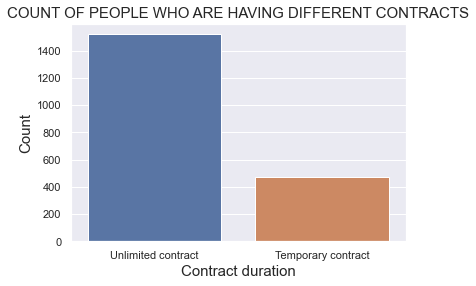

In [223]:
sns.set()
ax = sns.countplot(x="Contract duration",data=IT_EU_US)

plt.xlabel('Сontract duration',fontsize = 15) 
plt.ylabel('Count', fontsize = 15) 
plt.title("COUNT OF PEOPLE WHO ARE HAVING DIFFERENT CONTRACTS", fontsize = 15)

Text(0.5, 1.0, 'PROPORTION OF GENDERS')

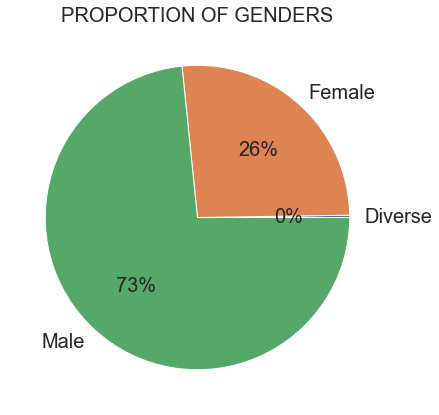

In [224]:
IT_EU_US.Gender.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%',figsize=(10, 7) , fontsize = 20)
plt.title("PROPORTION OF GENDERS", fontsize = 20)

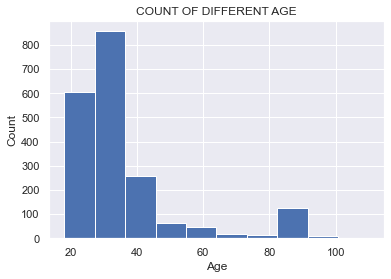

In [225]:
sns.set_theme(style="darkgrid")
p8= plt.hist(IT_EU_US['Age'],bins=10)
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title("COUNT OF DIFFERENT AGE")
plt.show(p8)

Text(0.5, 1.0, 'GENDERS RESPECTIVE TO THEIR AGES')

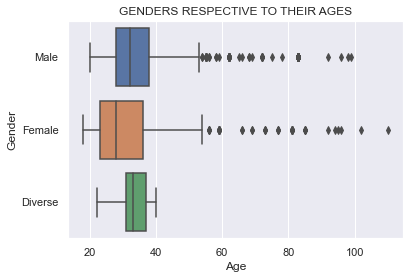

In [226]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x="Age", y="Gender", data=IT_EU_US)
plt.xlabel('Age') 
plt.ylabel('Gender') 
plt.title("GENDERS RESPECTIVE TO THEIR AGES")

Text(0.5, 1.0, 'DIFFERENT COMPANY SIZES AND ITS COUNT')

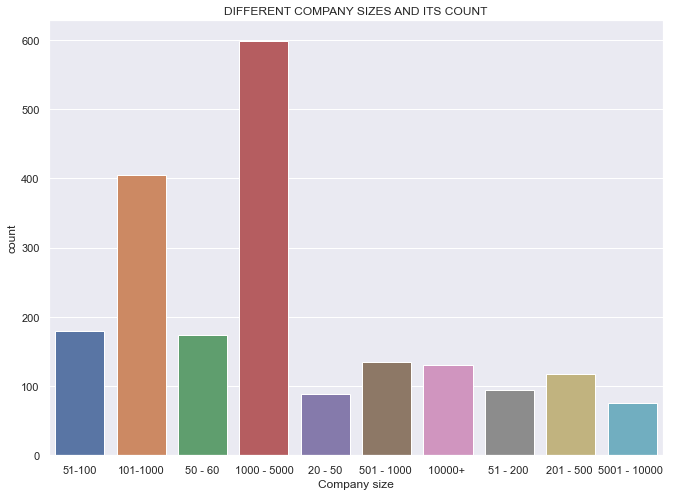

In [227]:
plt.figure(figsize = (11,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Company size",data=IT_EU_US)
plt.xlabel('Company size') 
plt.ylabel('count') 
plt.title("DIFFERENT COMPANY SIZES AND ITS COUNT")

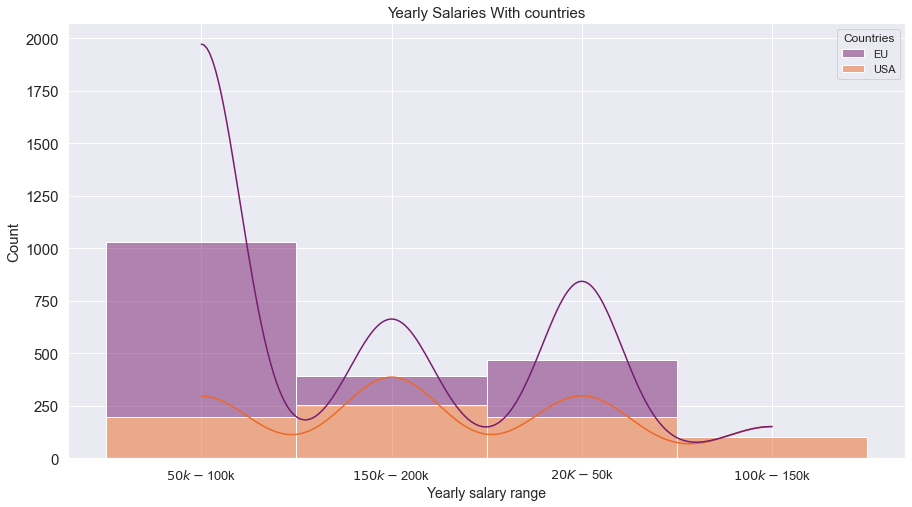

In [228]:
# Distribution of Yearly Salaries with countries
plt.figure(figsize=(15,8))

sns.histplot(x='Yearly salary range',data=IT_EU_US,
             bins=20, kde=True, hue='Countries',multiple="stack",palette='inferno')
plt.xticks(fontsize=13)
plt.xlabel("Yearly salary range",fontsize=14)
plt.yticks(fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Yearly Salaries With countries",fontsize=15)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Age', ylabel='Yearly salary range'>

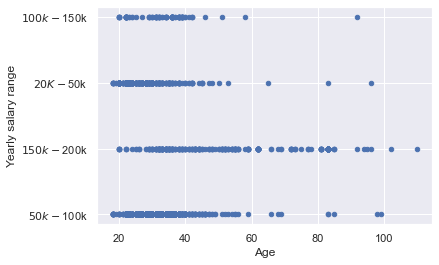

In [236]:
IT_EU_US.drop(IT_EU_US[IT_EU_US['Age'] == 0 ].index, inplace = True)
IT_EU_US.plot.scatter(x = 'Age', y = 'Yearly salary range')




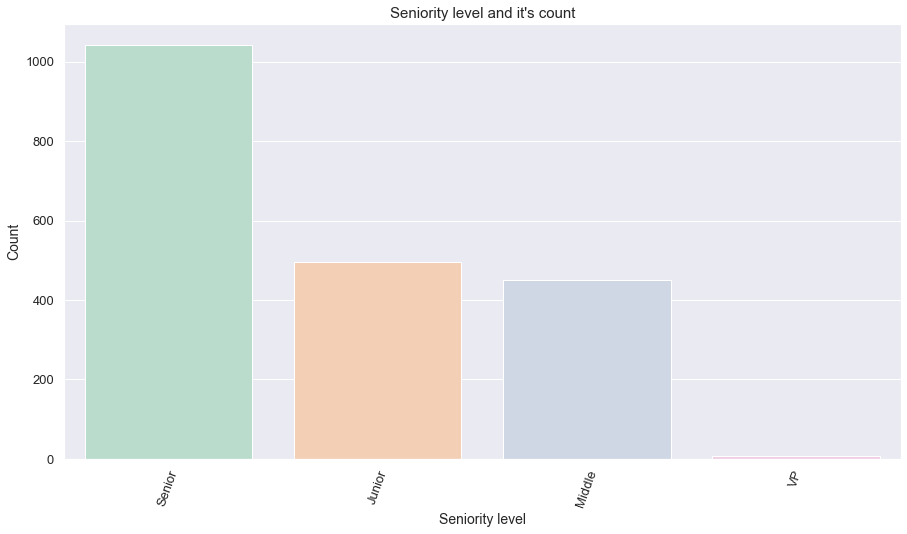

In [243]:
plt.figure(figsize=(15,8))
sns.countplot(data=IT_EU_US,x='Seniority level',
              order=IT_EU_US['Seniority level'].value_counts().iloc[:10].index,
              palette='Pastel2')
plt.xticks(rotation=70,fontsize=13)
plt.xlabel("Seniority level",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.title("Seniority level and it's count",fontsize = 15)
plt.show()

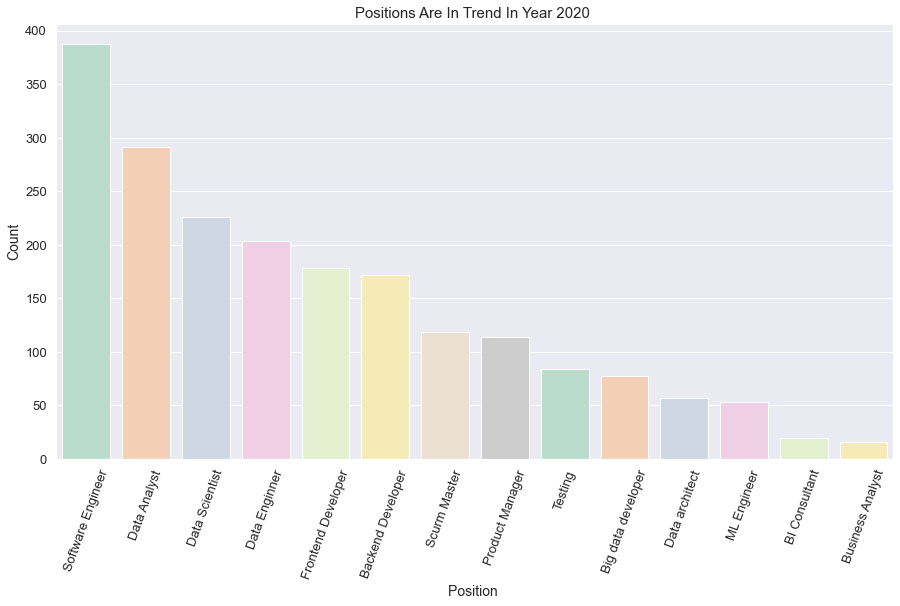

In [241]:
plt.figure(figsize=(15,8))
sns.countplot(data=IT_EU_US,x='Position ',
              order=IT_EU_US['Position '].value_counts().iloc[:20].index,
              palette='Pastel2')
plt.xticks(rotation=70,fontsize=13)
plt.xlabel("Position ",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.title("Positions Are In Trend In Year 2020 ",fontsize = 15)
plt.show()